Żeby kod działał bardziej optymalnie, każde zdjęcie chcemy zapisać w postaci 
trójwymiarowej macierzy w zapisie: długość x szerokość x 3 kanały kolorów (RGB).


In [1]:
#Zaimportowanie wymaganych bibliotek
import os
from pathlib import Path
import numpy as np
from PIL import Image

In [2]:
img = Image.open('Cubism/adolf-fleischmann_hommage-delaunay-et-gleizes-1938.jpg')

numpydata = np.asarray(img)
# <class 'numpy.ndarray'>
print(type(numpydata))

#  shape
print(numpydata.shape)

<class 'numpy.ndarray'>
(510, 309, 3)


In [4]:
#To train we will be using both delaunay test and train
DIR = 'Cubism\\'
#final size of an images
IMG_SIZE = 64 #docelowo 256
#number of colours chanels
IMG_COLOURS = 3 # RGB

In [5]:
path=Path(DIR)
a=0
for filename in path.rglob("*.jpg"):
    a+=1
a

2235

In [6]:
# Iterating over the images inside the directory and resizing them using
# Pillow's resize method.
# Resazing images to final size - we want all images to be the same size
# Also we are using AntiAlias to upgrade the quality of the images
path=Path(DIR)
train_data_raw=[]
for filename in path.rglob("*.jpg"):
    #lanczos also know as antialias function is the best quality filter for downscaling images, but has worst performance
    image = Image.open(filename).resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
    train_data_raw.append(np.asarray(image))

In [7]:
train_data=np.reshape(train_data_raw,(-1, IMG_SIZE, IMG_SIZE, IMG_COLOURS)).astype("float64")
# normalization (all colours range from 0 to 255)
# and we want it to range from -1 to 1
train_data = (train_data / 255)*2-1
train_data.shape

(2235, 64, 64, 3)

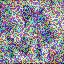

In [8]:
Image.fromarray(((train_data[1]+1)*255/2).astype(np.uint8))

In [9]:
#saving the numpy data images as the binary file for faster data processing on training
np.save(DIR+'cubism_data.npy', train_data)